In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
stock = pd.read_csv('RELIANCE_STOCK.csv')

In [3]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,36.747459,38.944569,36.747459,38.944569,29.684193,28802010.0
1,2000-01-04,39.981236,42.062302,38.882679,42.062302,32.060585,61320457.0
2,2000-01-05,39.710464,44.545658,39.710464,43.710136,33.316597,173426953.0
3,2000-01-06,44.715855,46.526150,44.715855,45.543640,34.714115,101355113.0
4,2000-01-07,45.644211,49.187443,45.334759,48.669109,37.096405,128426756.0


In [4]:
stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5750,2022-12-26,2514.750000,2542.000000,2492.399902,2524.050049,2524.050049,2764496.0
5751,2022-12-27,2530.000000,2548.800049,2515.250000,2544.699951,2544.699951,2659749.0
5752,2022-12-28,2538.000000,2549.800049,2521.500000,2544.449951,2544.449951,3442509.0
5753,2022-12-29,2527.000000,2548.899902,2525.500000,2543.300049,2543.300049,3198493.0
5754,2022-12-30,2545.100098,2577.000000,2541.100098,2547.199951,2547.199951,3364092.0


In [5]:
stock.shape

(5755, 7)

In [6]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755 entries, 0 to 5754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5755 non-null   object 
 1   Open       5745 non-null   float64
 2   High       5745 non-null   float64
 3   Low        5745 non-null   float64
 4   Close      5745 non-null   float64
 5   Adj Close  5745 non-null   float64
 6   Volume     5745 non-null   float64
dtypes: float64(6), object(1)
memory usage: 314.9+ KB


In [7]:
stock.isnull().sum()

,0
Date,0
Open,10
High,10
Low,10
Close,10
Adj Close,10
Volume,10


In [8]:
stock.dropna(inplace=True)
stock.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [9]:
stock.shape

(5745, 7)

### 10 rows with null values are eliminated

In [10]:
stock[stock.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


### There are no duplicate values

In [11]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5.745000e+03
mean,638.461095,646.283828,630.097175,637.879417,615.592615,1.681692e+07
std,679.735286,687.198000,671.907024,679.242266,682.151473,1.809928e+07
min,31.796223,33.962387,30.504259,31.440351,23.964357,0.000000e+00
25%,101.221848,103.666519,99.837044,101.291473,89.115646,6.334809e+06
50%,446.368866,450.975220,440.573792,446.145996,418.400177,1.016516e+07
75%,681.056763,690.801880,668.661743,675.992249,638.090271,2.036854e+07
max,2856.149902,2856.149902,2786.100098,2819.850098,2811.385742,2.918015e+08


In [12]:
stock['Date'] = pd.to_datetime(stock['Date'])
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5745 entries, 0 to 5754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5745 non-null   datetime64[ns]
 1   Open       5745 non-null   float64       
 2   High       5745 non-null   float64       
 3   Low        5745 non-null   float64       
 4   Close      5745 non-null   float64       
 5   Adj Close  5745 non-null   float64       
 6   Volume     5745 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 359.1 KB


In [13]:
df = stock


## DATA VISUALIZATION

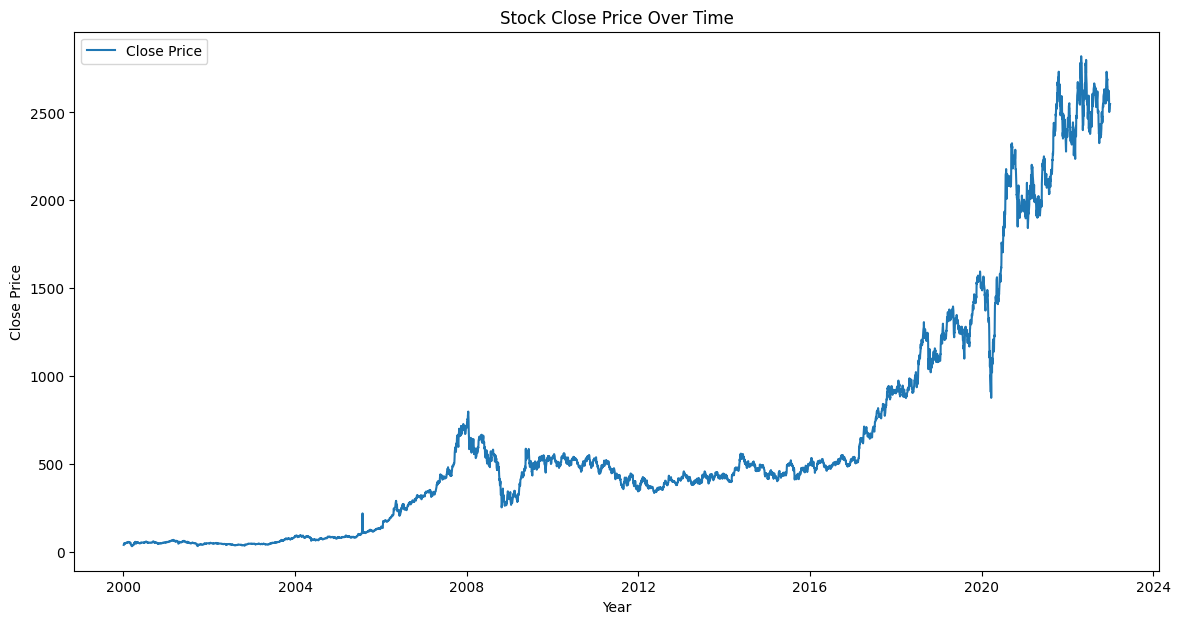

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Stock Close Price Over Time')
plt.legend()
plt.show()

### There is a significant increase in the closing price of the stocks over the years

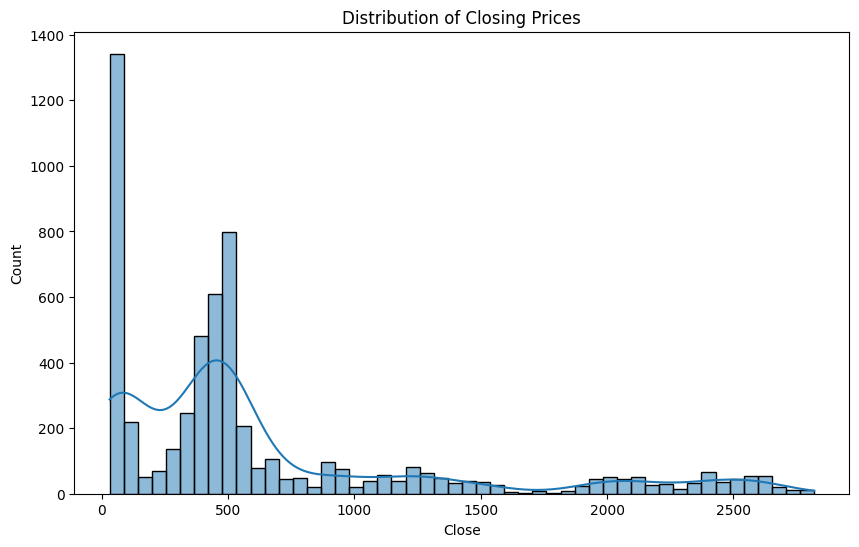

In [15]:
# Histogram of closing prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.show()

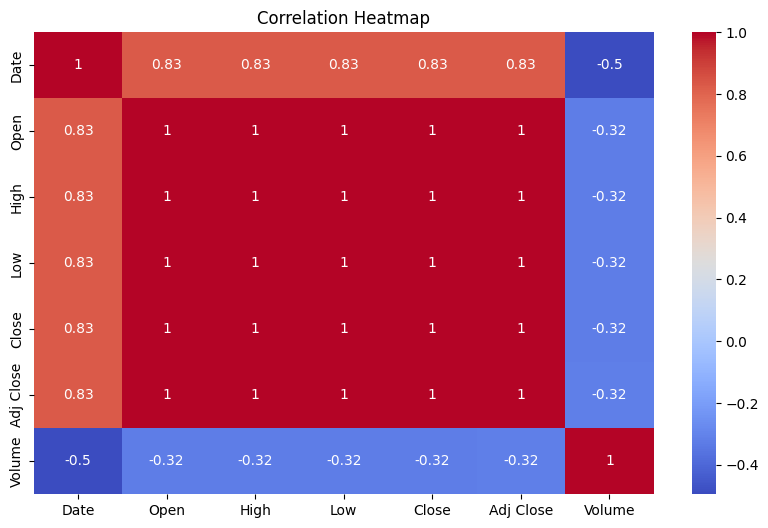

In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

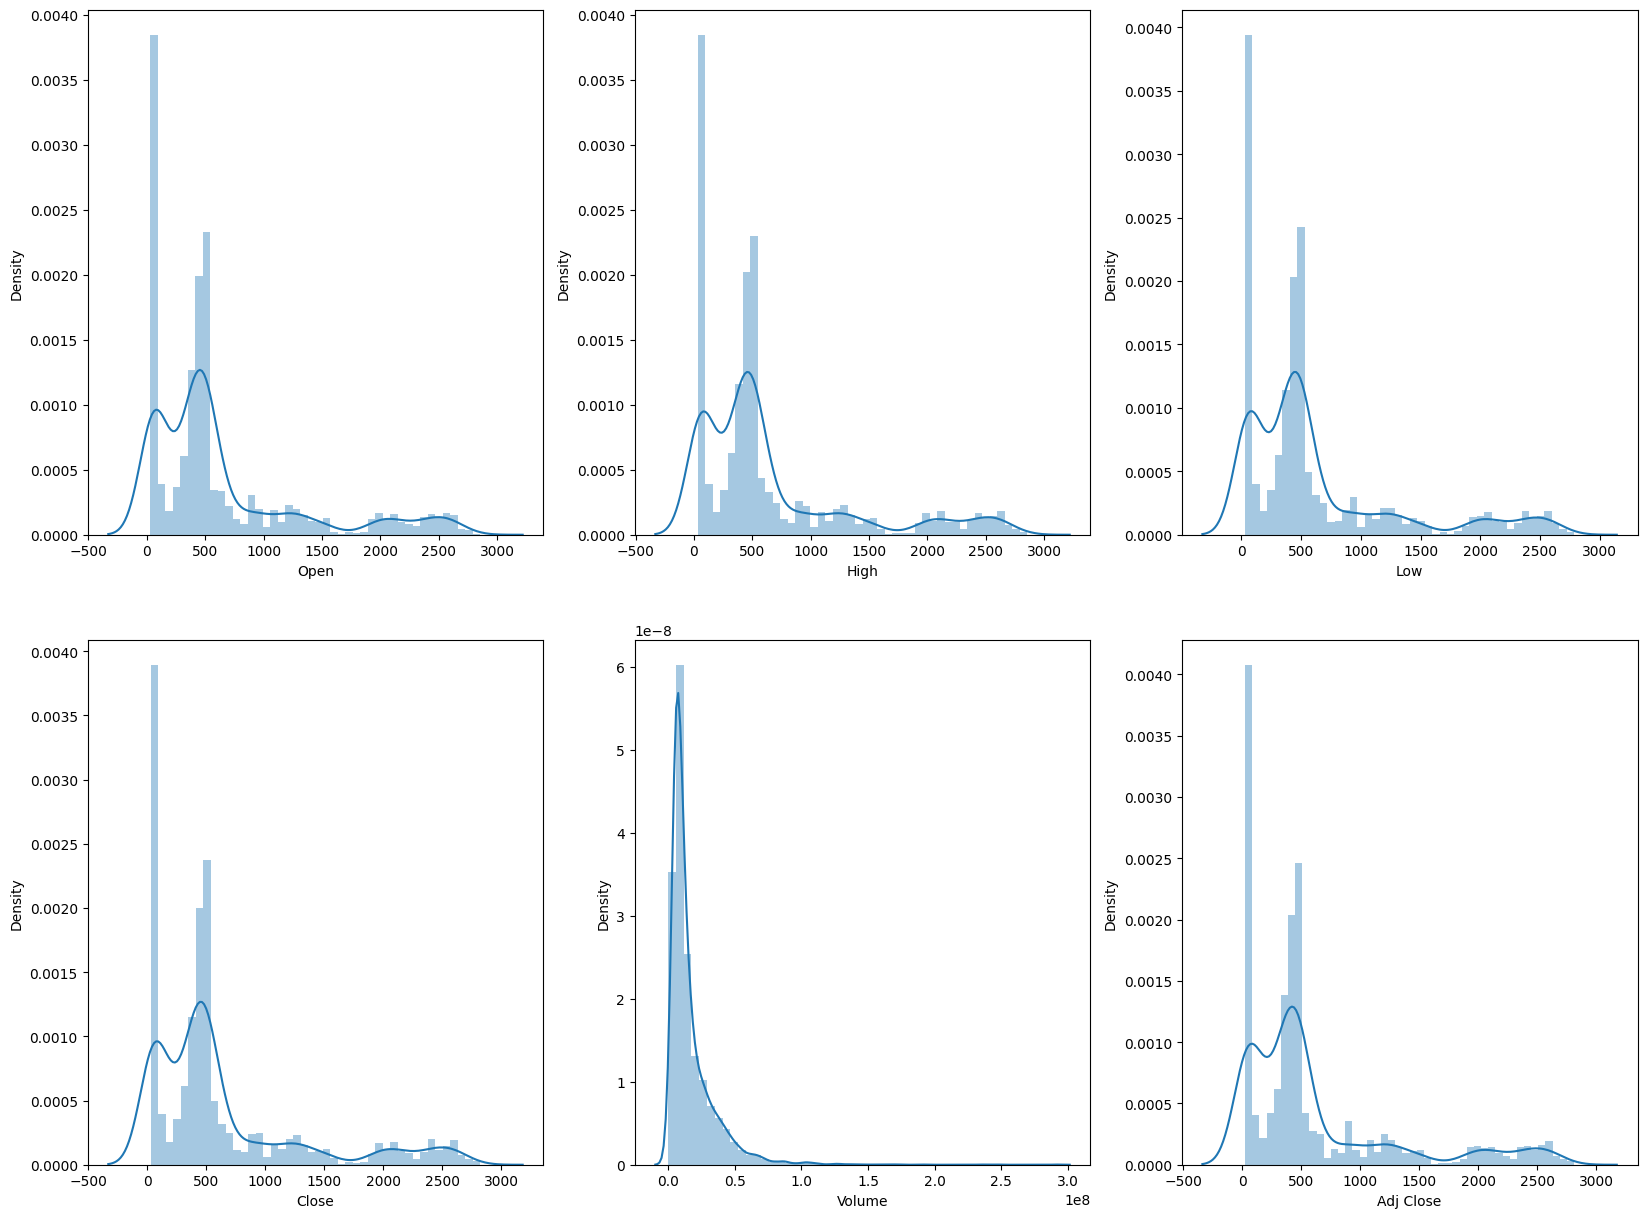

In [17]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

plt.subplots(figsize=(20,15))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.distplot(df[col])
plt.show()

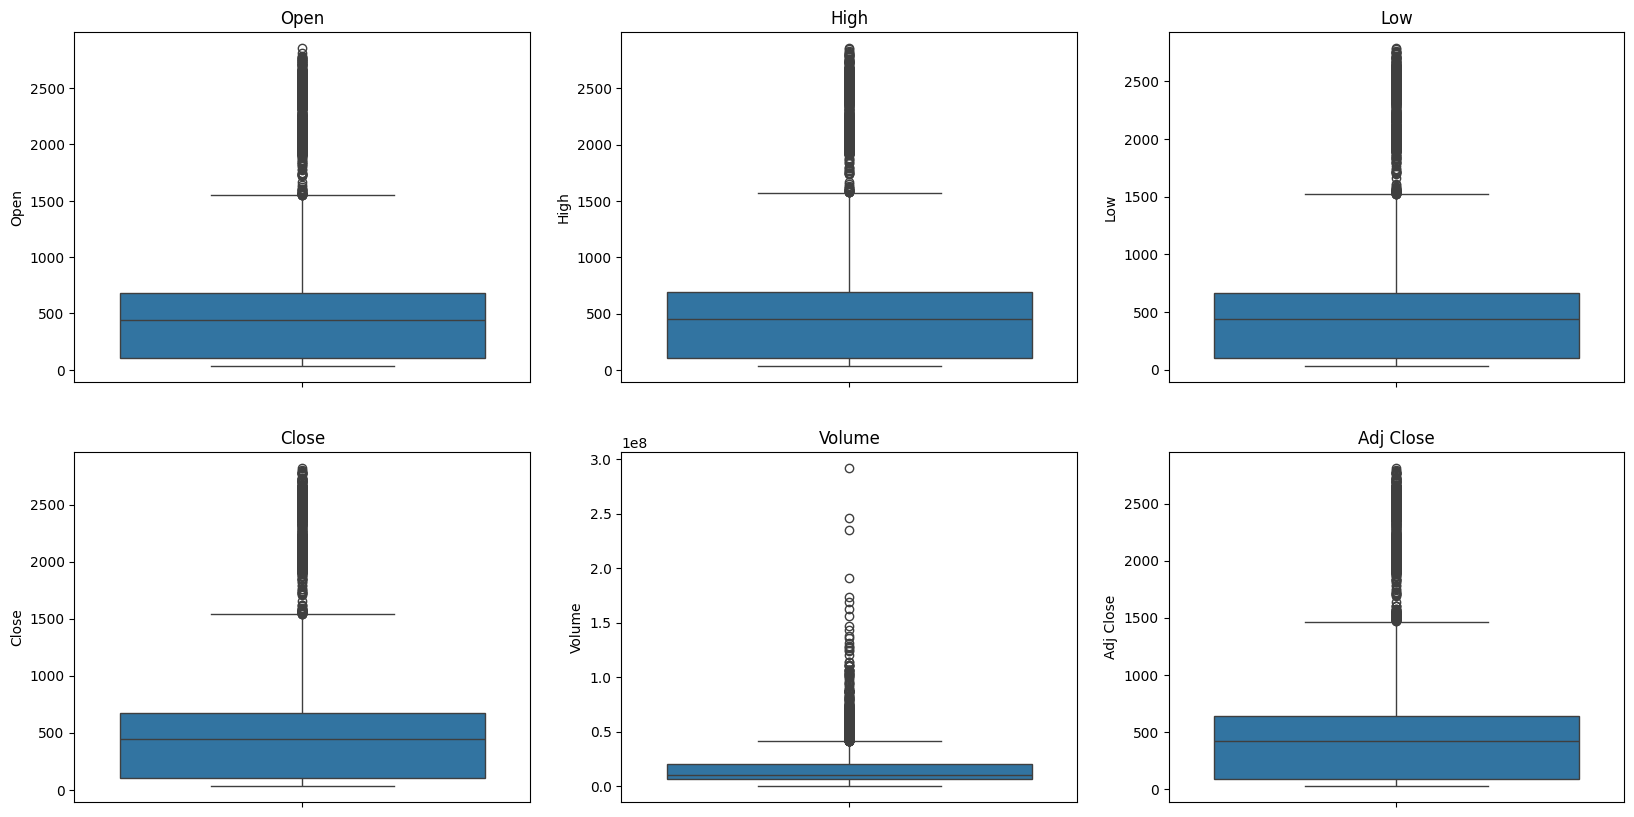

,Date,Open,High,Low,Close,Adj Close,Volume
count,5745,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5.745000e+03
mean,2011-05-24 05:56:25.691906048,638.461095,646.283828,630.097175,637.879417,615.592615,1.681692e+07
min,2000-01-03 00:00:00,31.796223,33.962387,30.504259,31.440351,23.964357,0.000000e+00
25%,2005-07-14 00:00:00,101.221848,103.666519,99.837044,101.291473,89.115646,6.334809e+06
50%,2011-05-10 00:00:00,446.368866,450.975220,440.573792,446.145996,418.400177,1.016516e+07
75%,2017-03-10 00:00:00,681.056763,690.801880,668.661743,675.992249,638.090271,2.036854e+07
max,2022-12-30 00:00:00,2856.149902,2856.149902,2786.100098,2819.850098,2811.385742,2.918015e+08
std,NaN,679.735286,687.198000,671.907024,679.242266,682.151473,1.809928e+07


In [18]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.show()

df.describe()

## **Outliers -** Detection and Handling.

In [19]:
# Calculating the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define Outliers using the inter-quantile range (IQR) method
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Cap Outliers
for column in df[1:]:
  lower_bound = Q1[column] - 1.5 * IQR[column]
  upper_bound = Q3[column] + 1.5 * IQR[column]
  df[column] = df[column].clip(lower_bound, upper_bound)

#verify the outliers are handled
data_no_outliers = df.describe()
data_no_outliers

,Date,Open,High,Low,Close,Adj Close,Volume
count,5745,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5.745000e+03
mean,2011-05-24 05:56:25.691906048,556.206301,563.484091,547.585403,554.356352,523.972068,1.507964e+07
min,2000-01-03 00:00:00,31.796223,33.962387,30.504259,31.440351,23.964357,0.000000e+00
25%,2005-07-14 00:00:00,101.221848,103.666519,99.837044,101.291473,89.115646,6.334809e+06
50%,2011-05-10 00:00:00,446.368866,450.975220,440.573792,446.145996,418.400177,1.016516e+07
75%,2017-03-10 00:00:00,681.056763,690.801880,668.661743,675.992249,638.090271,2.036854e+07
max,2022-12-30 00:00:00,1550.809136,1571.504921,1521.898792,1538.043413,1461.552209,4.141915e+07
std,NaN,486.141705,492.320934,477.885784,483.013258,468.082345,1.179332e+07


## **Outliers** - Visualization after being handled.

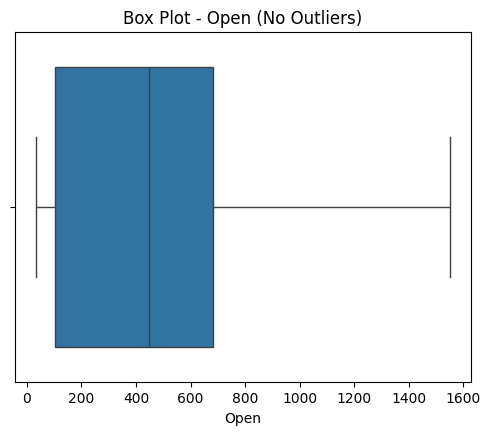

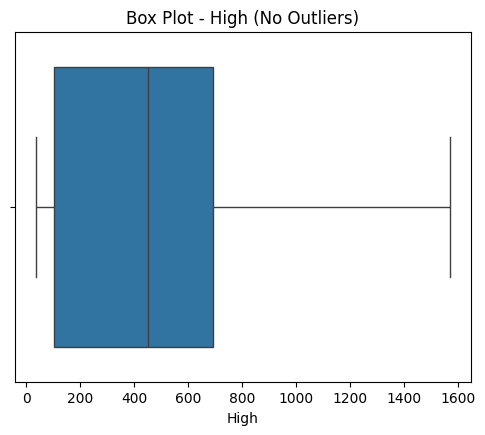

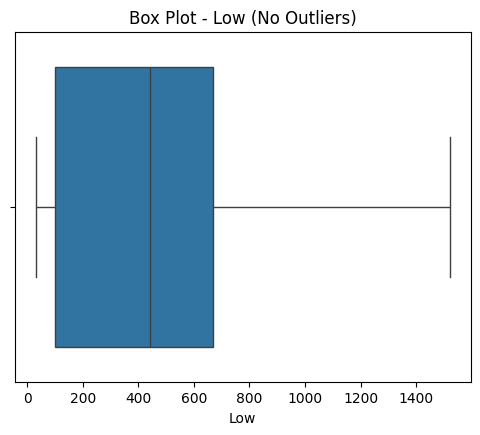

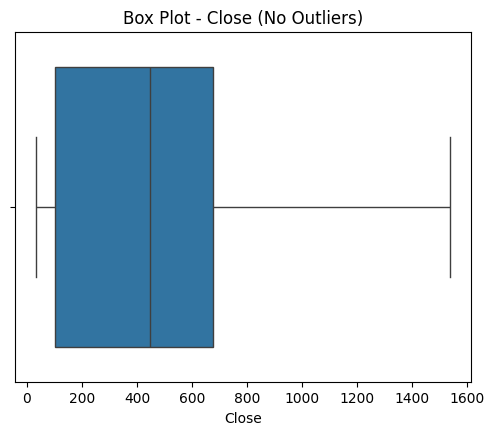

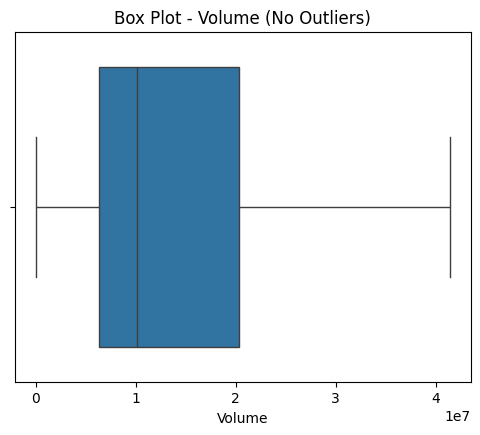

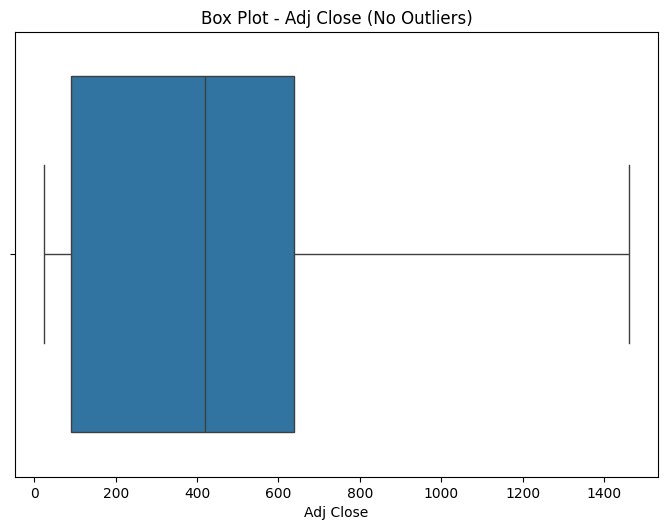

In [20]:
plt.figure(figsize = (20,10))
plt.subplot(2,3,1)
sns.boxplot(x=df['Open'])
plt.title('Box Plot - Open (No Outliers)')

plt.figure(figsize = (20,10))
plt.subplot(2,3,2)
sns.boxplot(x=df['High'])
plt.title('Box Plot - High (No Outliers)')

plt.figure(figsize = (20,10))
plt.subplot(2,3,3)
sns.boxplot(x=df['Low'])
plt.title('Box Plot - Low (No Outliers)')

plt.figure(figsize = (20,10))
plt.subplot(2,3,4)
sns.boxplot(x=df['Close'])
plt.title('Box Plot - Close (No Outliers)')

plt.figure(figsize = (20,10))
plt.subplot(2,3,5)
sns.boxplot(x=df['Volume'])
plt.title('Box Plot - Volume (No Outliers)')

plt.figure(figsize = (20,10))
plt.subplot(2,3,6)
sns.boxplot(x=df['Adj Close'])
plt.title('Box Plot - Adj Close (No Outliers)')

plt.tight_layout()
plt.show()

In [21]:
# CandleStick with Rangeslider
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

### Helps identify bullish(green) and bearish(red) candles, which indicate market sentiment

### Bullish - Price is likely to increase

### Bearish - Price is likely to fall

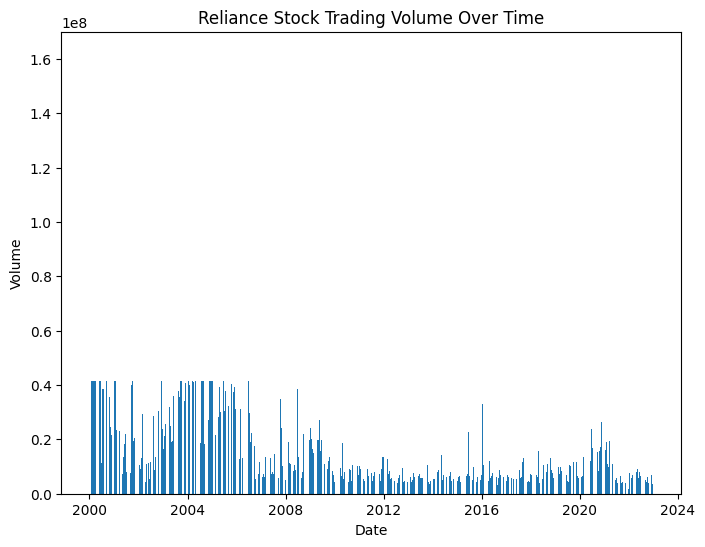

In [22]:
# Volume over time
plt.figure(figsize=(8,6))
plt.bar(df['Date'],df['Volume'])
plt.title('Reliance Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.ylim(0,1.7*10**8)
plt.show()

In [23]:
fig = go.Figure()
fig.add_trace(go.Bar(x=list(df.Date),y=list(df.Volume)))
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
fig.show()

### Observation - Shows amount of trading activity on each day

### High volume always coincides with significant price movements

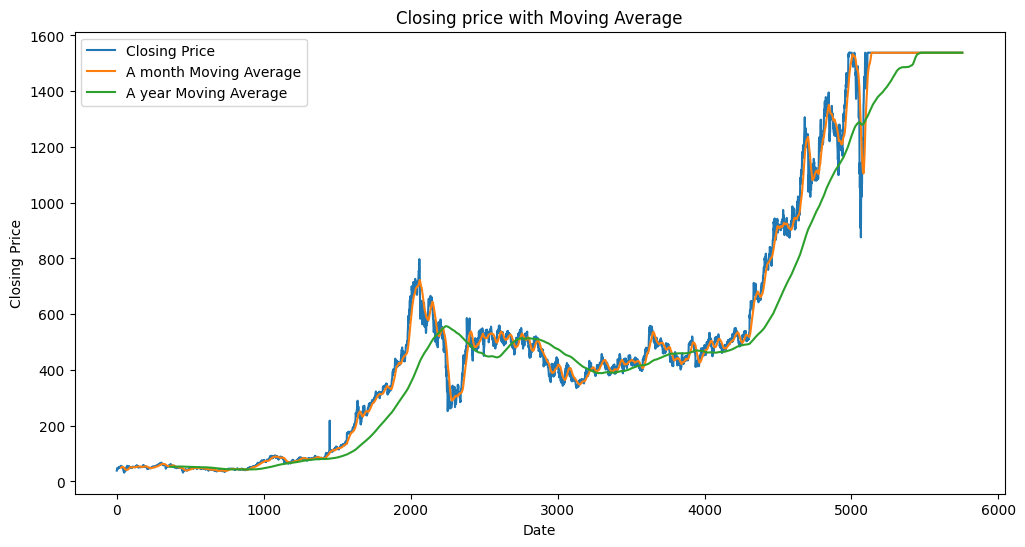

In [24]:
#Moving Average
plt.figure(figsize=(12,6))
plt.plot(df['Close'],label='Closing Price')
plt.plot(df['Close'].rolling(window=30).mean(),label='A month Moving Average')
plt.plot(df['Close'].rolling(window=365).mean(),label='A year Moving Average')
plt.title('Closing price with Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

### Moving averages smooth out price fluctuations to identify trends

### Crossovers between moving averages can signal potential buy or sell opportunities

#### Setting the date column as index.

In [25]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,36.747459,38.944569,36.747459,38.944569,29.684193,28802010.0
2000-01-04,39.981236,42.062302,38.882679,42.062302,32.060585,41419149.0
2000-01-05,39.710464,44.545658,39.710464,43.710136,33.316597,41419149.0
2000-01-06,44.715855,46.526150,44.715855,45.543640,34.714115,41419149.0
2000-01-07,45.644211,49.187443,45.334759,48.669109,37.096405,41419149.0


# **Model Building**: Implementing the various models

## 1. **Linear Regression**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### Prepare the features and labels

In [27]:
df['Day'] = df.index.dayofyear
X = df[['Day']]
y = df['Close']

#### Split the data into training and testing sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Initialize and train the model

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### Make predictions

In [30]:
lr_y_pred = lr.predict(X_test)
lr_y_pred

array([506.84418572, 524.6875745 , 542.24316668, ..., 537.92621779,
       569.58384304, 610.73875586])

#### Calculate RMSE

In [31]:
rmse_lr = np.sqrt(mean_squared_error(y_test, lr_y_pred))
rmse_lr

481.7770708365556

## 2. Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

#### Initialize the model

In [33]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

#### Train the model

In [34]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Make predictions

In [35]:
rf_y_pred = rf.predict(X_test)
rf_y_pred

array([555.1772794 , 658.44627569, 509.15304545, ..., 517.69992097,
       698.0944894 , 618.32737128])

#### Calculate RMSE

In [36]:
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rmse_rf

511.9839516964348

## 3. **LSTM** - Long Short Term Memory

In [37]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

#### Scale the data

In [53]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
scaled_df

array([[0.00498089],
       [0.00705027],
       [0.00814401],
       ...,
       [1.        ],
       [1.        ],
       [1.        ]])

In [57]:
train_df_len = int(np.ceil(len(scaled_df) * 0.8))
train_df = scaled_df[0:train_df_len, :]
test_df = scaled_df[train_df_len - 60:, :]
print('training data length:',train_df_len),
print('training data:',train_df),
print('testing data:',test_df)


training data length: 4596
training data: [[0.00498089]
 [0.00705027]
 [0.00814401]
 ...
 [0.61757605]
 [0.61501174]
 [0.62132388]]
testing data: [[0.57388435]
 [0.56947902]
 [0.5810841 ]
 ...
 [1.        ]
 [1.        ]
 [1.        ]]


#### Creating the training data

In [40]:
X_train = []
y_train = []
for i in range(60, len(train_df)):
    X_train.append(train_df[i-60:i, 0])
    y_train.append(train_df[i, 0])

#### Convert to numpy arrays

In [60]:
X_train, y_train = np.array(X_train), np.array(y_train)
print('X_train',X_train),
print('y_train',y_train),
print(X_train.shape),
print(y_train.shape)

X_train [[[0.00498089]
  [0.00705027]
  [0.00814401]
  ...
  [0.00412849]
  [0.00387688]
  [0.00384093]]

 [[0.00705027]
  [0.00814401]
  [0.00936099]
  ...
  [0.00387688]
  [0.00384093]
  [0.00581788]]

 [[0.00814401]
  [0.00936099]
  [0.0114355 ]
  ...
  [0.00384093]
  [0.00581788]
  [0.00795401]]

 ...

 [[0.57230634]
  [0.56569834]
  [0.56721061]
  ...
  [0.61869381]
  [0.61139542]
  [0.60636547]]

 [[0.56569834]
  [0.56721061]
  [0.57388435]
  ...
  [0.61139542]
  [0.60636547]
  [0.61757605]]

 [[0.56721061]
  [0.57388435]
  [0.56947902]
  ...
  [0.60636547]
  [0.61757605]
  [0.61501174]]]
y_train [0.00581788 0.00795401 0.00699378 ... 0.61757605 0.61501174 0.62132388]
(4536, 60, 1)
(4536,)


#### to reshape data

In [61]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape),
print('X_train',X_train)

(4536, 60, 1)
X_train [[[0.00498089]
  [0.00705027]
  [0.00814401]
  ...
  [0.00412849]
  [0.00387688]
  [0.00384093]]

 [[0.00705027]
  [0.00814401]
  [0.00936099]
  ...
  [0.00387688]
  [0.00384093]
  [0.00581788]]

 [[0.00814401]
  [0.00936099]
  [0.0114355 ]
  ...
  [0.00384093]
  [0.00581788]
  [0.00795401]]

 ...

 [[0.57230634]
  [0.56569834]
  [0.56721061]
  ...
  [0.61869381]
  [0.61139542]
  [0.60636547]]

 [[0.56569834]
  [0.56721061]
  [0.57388435]
  ...
  [0.61139542]
  [0.60636547]
  [0.61757605]]

 [[0.56721061]
  [0.57388435]
  [0.56947902]
  ...
  [0.60636547]
  [0.61757605]
  [0.61501174]]]


#### making the LSTM model

In [43]:
lstm = Sequential()
lstm.add(LSTM(units=50, return_sequences=True))
lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm.add(Dense(units=25))
lstm.add(Dense(units=1))

#### Compiling the model

In [44]:
lstm.compile(optimizer='adam', loss='mean_squared_error')

#### training the model

In [45]:
lstm.fit(X_train, y_train, batch_size=1, epochs=1)

4536/4536 [==============================] - 155s 33ms/step - loss: 0.0015


#### Creating the testing data

In [46]:
X_test = []
for i in range(60, len(test_df)):
    X_test.append(test_df[i-60:i, 0])

#### Converting to numpy arrays

In [62]:
X_test = np.array(X_test)
print('X_test',X_test),
print(X_test.shape)

X_test [[[0.57388435]
  [0.56947902]
  [0.5810841 ]
  ...
  [0.61757605]
  [0.61501174]
  [0.62132388]]

 [[0.56947902]
  [0.5810841 ]
  [0.59301798]
  ...
  [0.61501174]
  [0.62132388]
  [0.6242498 ]]

 [[0.5810841 ]
  [0.59301798]
  [0.59433299]
  ...
  [0.62132388]
  [0.6242498 ]
  [0.62957564]]

 ...

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]]
(1149, 60, 1)


#### Reshaping the data

In [63]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print('X_test',X_test),
print(X_test.shape)

X_test [[[0.57388435]
  [0.56947902]
  [0.5810841 ]
  ...
  [0.61757605]
  [0.61501174]
  [0.62132388]]

 [[0.56947902]
  [0.5810841 ]
  [0.59301798]
  ...
  [0.61501174]
  [0.62132388]
  [0.6242498 ]]

 [[0.5810841 ]
  [0.59301798]
  [0.59433299]
  ...
  [0.62132388]
  [0.6242498 ]
  [0.62957564]]

 ...

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]]
(1149, 60, 1)


#### to fetch model's predicted price values

In [64]:
predictions_lstm = lstm.predict(X_test)
predictions_lstm = predictions_lstm.reshape(predictions_lstm.shape[0], -1)
predictions_lstm = scaler.inverse_transform(predictions_lstm)
print('LSTM predictions :',predictions_lstm)

36/36 [==============================] - 1s 25ms/step
LSTM predictions : [[ 872.23724  834.04584  856.06866 ...  914.55145  908.8333   918.8244 ]
 [ 865.49036  852.0771   872.65857 ...  908.8332   918.8244   922.3578 ]
 [ 883.2622   868.58954  873.39575 ...  918.82446  922.35785  930.20447]
 ...
 [1511.203   1405.7498  1431.9153  ... 1450.8928  1450.8927  1450.893  ]
 [1511.203   1405.7498  1431.9153  ... 1450.8928  1450.8927  1450.893  ]
 [1511.203   1405.75    1431.9153  ... 1450.8927  1450.8927  1450.893  ]]


#### Creating y_test for the LSTM model building

In [65]:
y_test_lstm = df['Close'][train_df_len:].values
print('y_test for LSTM',y_test_lstm)

y_test for LSTM [ 971.937012  979.960938  977.335815 ... 1538.043413 1538.043413
 1538.043413]


#### **observation-** predictions_lstm is a 2-D array with shape(1149,60) while y_test_lstm is a 1-D array (1149)

#### **changes** -So we reshape the array

In [66]:
y_test_lstm = y_test_lstm.reshape(-1, 1)
print('y_test for LSTM after reshaping',y_test_lstm)

y_test for LSTM after reshaping [[ 971.937012]
 [ 979.960938]
 [ 977.335815]
 ...
 [1538.043413]
 [1538.043413]
 [1538.043413]]


#### for calculating **RMSE**- Root mean Sq. error

In [52]:
rmse_lstm = np.sqrt(np.mean(((predictions_lstm - y_test_lstm) ** 2)))
print(f"LSTM RMSE: {rmse_lstm}")

LSTM RMSE: 138.8824663288928
